In [14]:
#Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

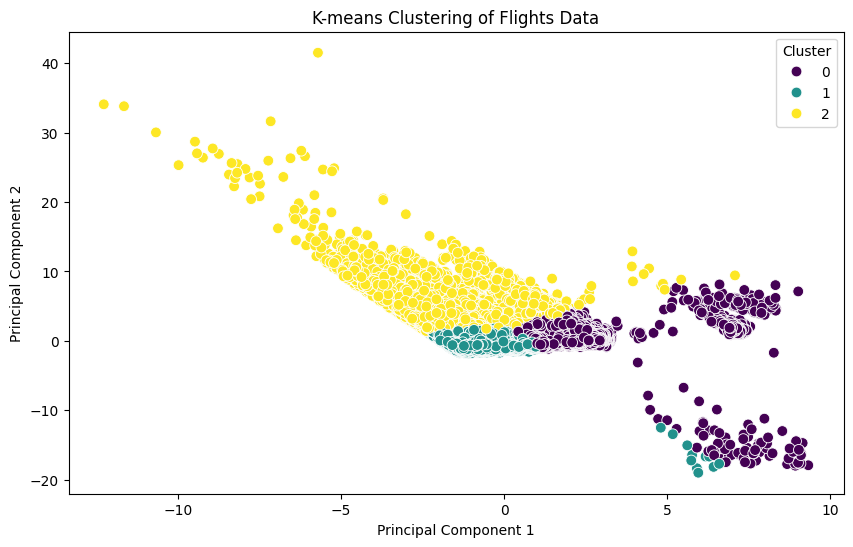

In [15]:
#K-Means model
data = pd.read_csv('cleaned_data.csv')
features = data[['dep_delay', 'arr_delay', 'distance', 'air_time']]
data = data.dropna(subset=['dep_delay', 'arr_delay', 'distance', 'air_time'])
features = data[['dep_delay', 'arr_delay', 'distance', 'air_time']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)
labels = kmeans.labels_
data['Cluster'] = labels
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=data['Cluster'], palette='viridis', s=60)
plt.title('K-means Clustering of Flights Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

**Questions answered**

1. Which airline has most delays?

In [16]:
delay_counts = data[data['Delayed'] == 'Yes'].groupby('carrier').size().sort_values(ascending=False)
print("Delays by airline:")
print(delay_counts)

Delays by airline:
carrier
EV    24608
B6    23679
UA    22341
DL    16490
MQ    11727
AA    10805
US     7358
9E     6684
WN     5335
FL     1900
VX     1753
F9      392
YV      258
AS      192
HA       97
OO       10
dtype: int64


The airline with the most delays is ExpressJet Airlines (EV), with 24,608 delays, as per the results.

2. Which are the frequently traveled routes - Can they be optimized?

In [17]:
data['route'] = data['Origin City'] + " → " + data['Destination City']
route_counts = data['route'].value_counts().head(10)
print("Top 10 frequently traveled routes:")
print(route_counts)

Top 10 frequently traveled routes:
route
New York → Chicago            13253
New York → Washington         12450
New York → Atlanta            12193
New York → Los Angeles        11262
New York → Boston             10181
New York → Orlando             9141
New York → Miami               9095
New York → Charlotte           9038
New York → Fort Lauderdale     8262
New York → San Francisco       8204
Name: count, dtype: int64


The top 3 most frequently traveled routes are:

New York → Chicago: 13,253 trips

New York → Washington: 12,450 trips

New York → Atlanta: 12,193 trips

They can be optimised by:

New York → Chicago: Monitor peak travel hours and assess delays on this route. Adding flights or optimizing departure slots can help.

New York → Washington & New York → Atlanta: Evaluate passenger demand during holiday and weekend periods. Resources could be reallocated to reduce wait times.


3. What are the trends of holiday seasons on airlines?

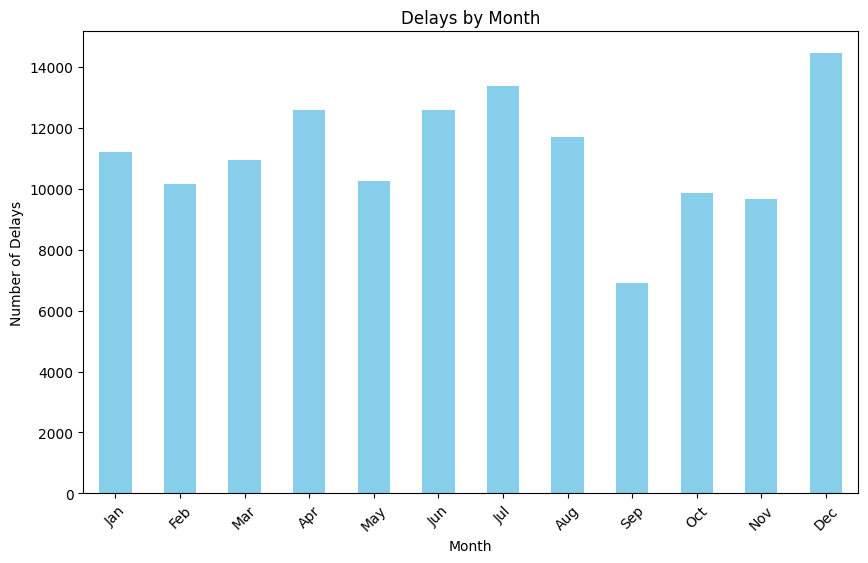

In [18]:
monthly_delays = data[data['Delayed'] == 'Yes'].groupby('month').size()
plt.figure(figsize=(10, 6))
monthly_delays.plot(kind='bar', color='skyblue')
plt.title('Delays by Month')
plt.xlabel('Month')
plt.ylabel('Number of Delays')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

December has the highest number of delays, followed by July and June and April.
Significant delays occur during peak travel months, indicating holiday season stress